## Description
> This project is an assignment from coursera "Applied Data Science Specialization" course, Here we are going to predeict the chances of car accident based on some features (condition)

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


## Introduction/Business Problem

The main objective is to predict the accidental severity, and to see what type of collision (features) led's to higher fatalities in an accidental case that would help the transport department to know the cause of higher fatalities in an accident and they able to work work on cause to remove the chances of causing higher fatalities during and automobile collision


### Used Dataset: 
<b>Source:</b> seattle.gov <br>
This includes all types of collisions. Collisions will display at the intersection or mid-block of a segment. Timeframe: 2004 to Present.

## Data understanding:
<br>
<br>
In this phase we are going to understand the feature (attributes/column) that we will use to train our model<br>
<b>we will choose our data attributes based on:</b><br>
<ul>
    <li> patterns </li>
    <li> correlations </li>
    <li>skewed information</li>
</ul>

### Loading csv

In [108]:
df = pd.read_csv('../data-science-specialisation/Data-Collisions.csv')

/home/anuj/ml-final/Regression_Multiple_Model_Project/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Fetching list of attributes we have in our csv

In [109]:
df.columns.values

array(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY',
       'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION',
       'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING',
       'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR'], dtype=object)

### Checking data corellation

In [110]:
df.corr()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
X,0.010309,1.000000,-0.160262,0.009956,0.010309,0.010300,0.120754,0.010309,0.012887,0.011304,-0.001752,-0.012168,0.010904,-0.001016,-0.001618,0.013586
Y,0.017737,-0.160262,1.000000,-0.023848,-0.027396,-0.027415,-0.114935,0.017737,-0.013850,0.010178,0.026304,0.017058,-0.019694,-0.006958,0.004618,0.009508
OBJECTID,0.020131,0.009956,-0.023848,1.000000,0.946383,0.945837,0.046929,0.020131,-0.062333,0.024604,0.034432,-0.094280,-0.037094,0.969276,0.028076,0.056046
INCKEY,0.022065,0.010309,-0.027396,0.946383,1.000000,0.999996,0.048524,0.022065,-0.061500,0.024918,0.031342,-0.107528,-0.027617,0.990571,0.019701,0.048179
COLDETKEY,0.022079,0.010300,-0.027415,0.945837,0.999996,1.000000,0.048499,0.022079,-0.061403,0.024914,0.031296,-0.107598,-0.027461,0.990571,0.019586,0.048063
INTKEY,0.006553,0.120754,-0.114935,0.046929,0.048524,0.048499,1.000000,0.006553,0.001886,-0.004784,0.000531,-0.012929,0.007114,0.032604,-0.010510,0.018420
SEVERITYCODE.1,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
PERSONCOUNT,0.130949,0.012887,-0.013850,-0.062333,-0.061500,-0.061403,0.001886,0.130949,1.000000,-0.023464,-0.038809,0.380523,-0.128960,0.011784,-0.021383,-0.032258
PEDCOUNT,0.246338,0.011304,0.010178,0.024604,0.024918,0.024914,-0.004784,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.260393,0.021461,0.001810,0.565326


### Visual Representation of the Correlation Matrix 

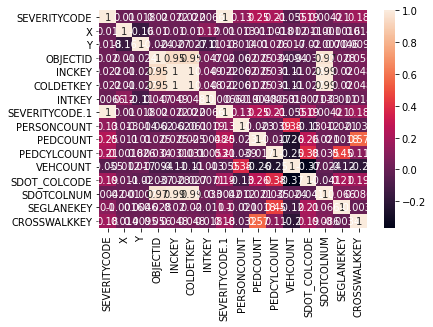

<Figure size 2808x1440 with 0 Axes>

In [111]:
sns.heatmap(df.corr(), annot=True)
plt.figure(figsize=(39,20))
plt.show()

### Checking attribute types and it's integrity

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

### Data visualization on VEHCOUNT Vs SEVERITYCODE

Text(0, 0.5, 'Severity code')

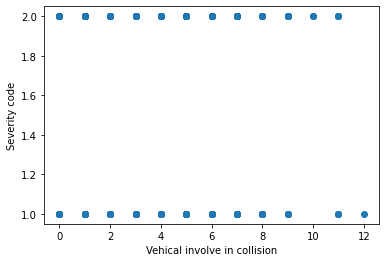

In [113]:
plt.scatter(y=df['SEVERITYCODE'], x=df['VEHCOUNT'])
plt.xlabel("Vehical involve in collision")
plt.ylabel("Severity code")

### Attributes detailing and Feature Extraction

In [114]:
"""Description: The number of vehicles involved in the collision."""
df['VEHCOUNT'].value_counts().to_frame('count') # feature

,count
2,147650
1,25748
3,13010
0,5085
4,2426
5,529
6,146
7,46
8,15
9,9


In [115]:
"""description: The total number of people involved in the collision"""
df['PERSONCOUNT'].value_counts().to_frame('count') # feature

,count
2,114231
3,35553
4,14660
1,13154
5,6584
0,5544
6,2702
7,1131
8,533
9,216


In [116]:
""" description: The number of pedestrians involved in the collision"""
df['PEDCOUNT'].value_counts().to_frame('count') #feature

,count
0,187734
1,6685
2,226
3,22
4,4
6,1
5,1


In [117]:
"""The number of bicycles involved in the collision."""
df['PEDCYLCOUNT'].value_counts().to_frame('count') # feature

,count
0,189189
1,5441
2,43


In [118]:
"""A code given to the collision by SDOT."""
df['SDOT_COLCODE'].value_counts().to_frame('count') # feature

,count
11,85209
14,54299
16,9928
0,9787
28,8856
24,6518
13,5852
26,4741
18,3104
15,1604


In [119]:
df['SDOT_COLDESC'][0] # ignore 

'MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE'

In [120]:
"""A number given to the collision by SDOT."""
df['SDOTCOLNUM'][1] # not a feature 

6354039.0

In [121]:
"""A key for the lane segment in which the collision occurred."""
df['SEGLANEKEY'].value_counts().to_frame('count') # not a feature for severity

,count
0,191907
6532,19
6078,16
12162,15
10336,14
...,...
35157,1
10817,1
15043,1
525169,1


In [122]:
"""A key for the crosswalk at which the collision occurred."""
df['CROSSWALKKEY'].value_counts().to_frame('count') # not a feature for severity 

,count
0,190862
523609,17
520838,15
525567,13
521707,10
...,...
521019,1
630862,1
25545,1
523322,1


In [123]:
# final feaure list
features = ['VEHCOUNT', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'SDOT_COLCODE', 'SEVERITYCODE']

### Data Preparation: 

In [124]:
feature_df = df[features]

In [125]:
feature_df.head()

,VEHCOUNT,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,SDOT_COLCODE,SEVERITYCODE
0,2,2,0,0,11,2
1,2,2,0,0,16,1
2,3,4,0,0,14,1
3,3,3,0,0,11,1
4,2,2,0,0,11,2


In [126]:
feature_df

,VEHCOUNT,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,SDOT_COLCODE,SEVERITYCODE
0,2,2,0,0,11,2
1,2,2,0,0,16,1
2,3,4,0,0,14,1
3,3,3,0,0,11,1
4,2,2,0,0,11,2
...,...,...,...,...,...,...
194668,2,3,0,0,11,2
194669,2,2,0,0,14,1
194670,2,3,0,0,11,2
194671,1,2,0,1,51,2


In [127]:
feature_df[feature_df['SEVERITYCODE'] == np.nan]

,VEHCOUNT,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,SDOT_COLCODE,SEVERITYCODE


In [128]:
len(feature_df)

194673

In [129]:
feature_df.dropna()

,VEHCOUNT,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,SDOT_COLCODE,SEVERITYCODE
0,2,2,0,0,11,2
1,2,2,0,0,16,1
2,3,4,0,0,14,1
3,3,3,0,0,11,1
4,2,2,0,0,11,2
...,...,...,...,...,...,...
194668,2,3,0,0,11,2
194669,2,2,0,0,14,1
194670,2,3,0,0,11,2
194671,1,2,0,1,51,2


In [136]:
len(feature_df)

194673

In [140]:
feature_df.corr()

,VEHCOUNT,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,SDOT_COLCODE,SEVERITYCODE
VEHCOUNT,1.000000,0.380523,-0.261285,-0.253773,-0.365814,-0.054686
PERSONCOUNT,0.380523,1.000000,-0.023464,-0.038809,-0.128960,0.130949
PEDCOUNT,-0.261285,-0.023464,1.000000,-0.016920,0.260393,0.246338
PEDCYLCOUNT,-0.253773,-0.038809,-0.016920,1.000000,0.382521,0.214218
SDOT_COLCODE,-0.365814,-0.128960,0.260393,0.382521,1.000000,0.188905
SEVERITYCODE,-0.054686,0.130949,0.246338,0.214218,0.188905,1.000000


## Modeling

In [131]:
from sklearn.linear_model import LinearRegression

In [160]:
m_df = feature_df[['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'SDOT_COLCODE']]

In [169]:
m_df

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,SDOT_COLCODE
0,2,0,0,11
1,2,0,0,16
2,4,0,0,14
3,3,0,0,11
4,2,0,0,11
...,...,...,...,...
194668,3,0,0,11
194669,2,0,0,14
194670,3,0,0,11
194671,2,0,1,51


In [175]:
x=m_df.to_numpy()

In [176]:
x

array([[ 2,  0,  0, 11],
       [ 2,  0,  0, 16],
       [ 4,  0,  0, 14],
       ...,
       [ 3,  0,  0, 11],
       [ 2,  0,  1, 51],
       [ 2,  0,  0, 14]])

In [164]:
y=feature_df['SEVERITYCODE'].to_numpy()

In [165]:
y

array([2, 1, 1, ..., 2, 2, 1])

In [178]:
reg = LinearRegression().fit(x, y)

## Evaluation

In [167]:
reg.score(x, y)

0.1335991371476697

In [181]:
df[0:1]

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.70314,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N


In [183]:
reg.predict(m_df[0:1]) # predicting value

array([1.22648982])